IMPORT DATASET

Tujuan untuk mengetahui apakah seseorang selamat atau tidak berdasarkan fitur-fitur yang ada

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

!cp drive/MyDrive/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d brendan45774/test-file

!unzip test-file.zip

  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 22.7MB/s]
Archive:  test-file.zip
  inflating: tested.csv              


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [ ]:
#read dataset yang sudah didownload dari kaggle
df = pd.read_csv('tested.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


DATA VISUALIZATION AND PREPROCESSING

In [ ]:
#Keterangan Class

# PassengerId: ID unik yang dimiliki masing-masing passenger
# Survived: Data apakah passenger selamat atau tidak
# Pclass: Kelas yang diambil dari passenger
# Name: Nama passenger
# Sex: Jenis kelamin dari passenger
# Age: umur dari passenger
# SibSp: jumlah kerabat
# Parch: jumlah orang tua atau anak
# Ticket : Nomor tiket
# Fare: tarif membeli tiket
# Cabin: Nomor Cabin
# Embarked: Mau mendarat dimana? (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

#mengecek data-data statistik dari masing-masing fitur

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#labeling data jenis-kelamin dan embarked. Hal ini dikarenakan data dari jenis-kelamin serta embarked bukan angka numerik
LE = LabelEncoder()

df['Sex'] = LE.fit_transform(df['Sex'])
df['Embarked'] = LE.fit_transform(df['Embarked'])

df

#keterangan Sex :
#0 -> female
#1 -> male

#keterangan Embarked :
# C => 0
# Q => 1
# S => 2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,2


<ipython-input-80-2e72209a80da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


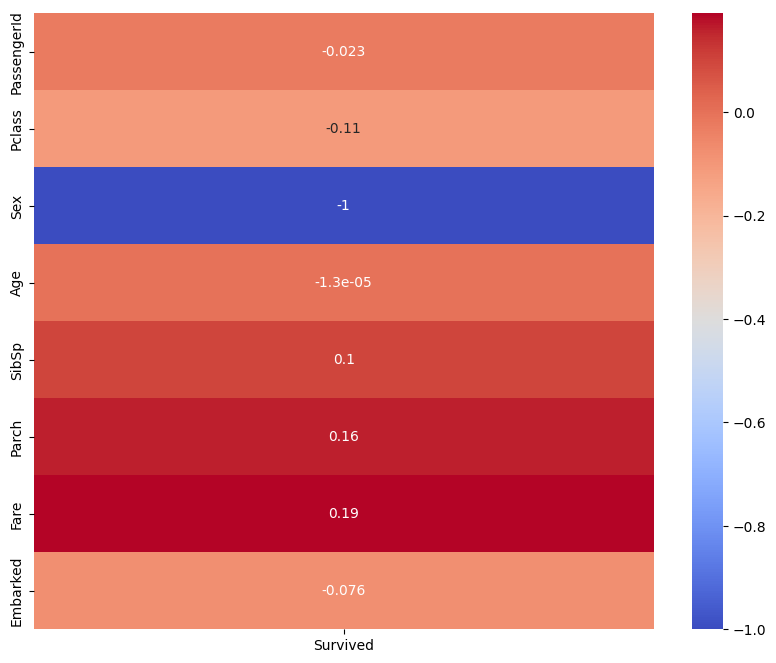

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
correlation_values = corr_matrix['Survived'].drop('Survived')
correlation_df = pd.DataFrame({'Survived': correlation_values})

sns.heatmap(correlation_df, annot=True, cmap='coolwarm')

plt.show()

#melihat korelasi antara kolom survived dengan kolom lainnya.

In [ ]:
#mengelompokkan 'Age' dan 'Fare' supaya lebih gampang untuk di visualisasi

df['Age_group'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 100])

df['Fare_group'] = pd.cut(df['Fare'], bins=[0, 100, 200, 300, 400, 500, 600])

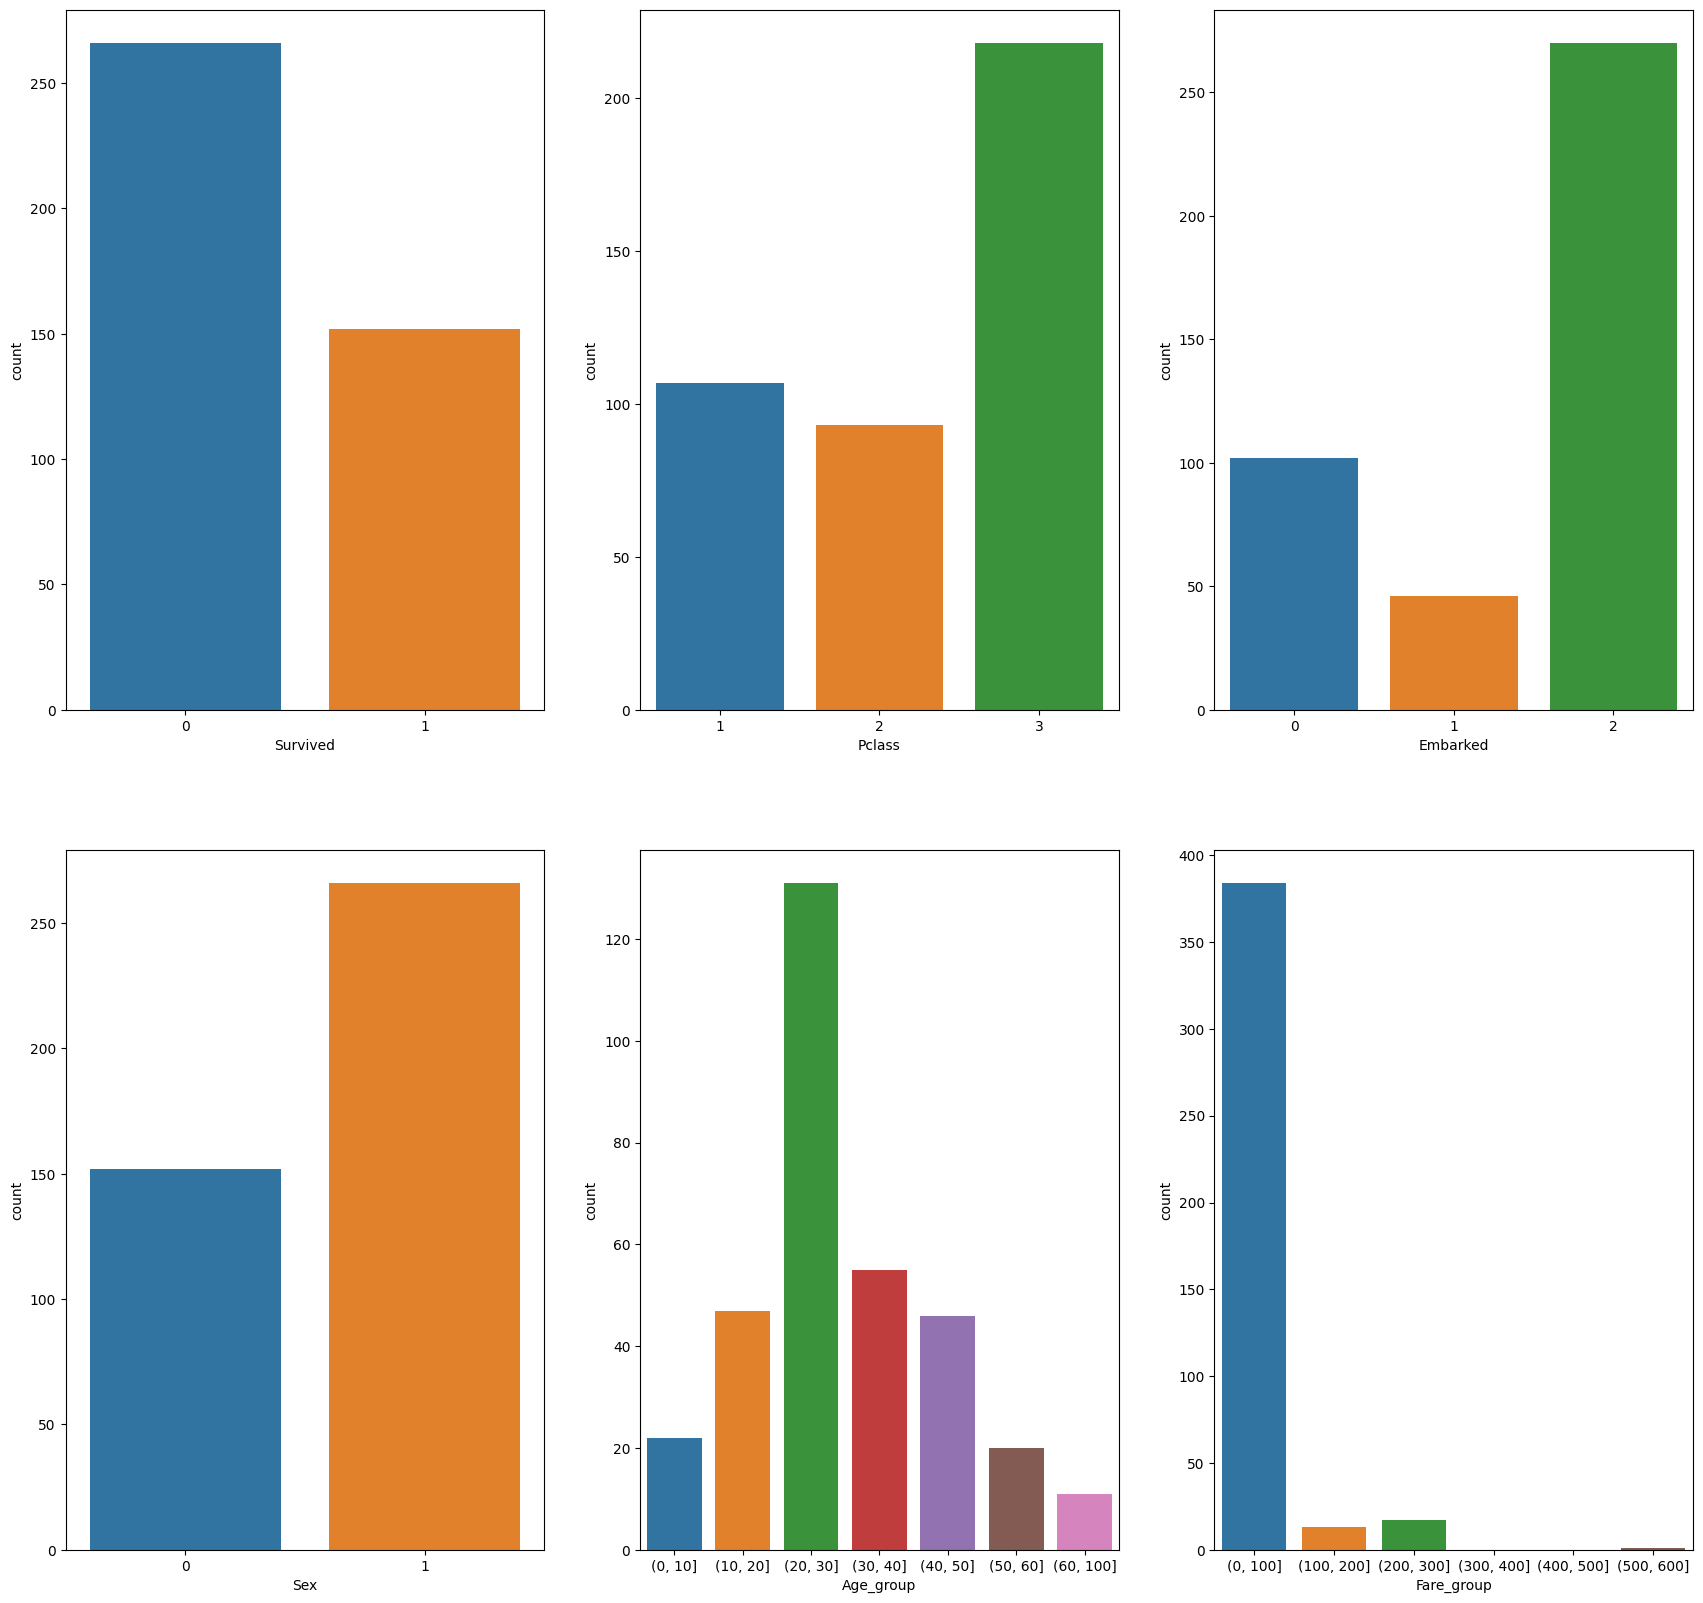

In [ ]:
#hitung jumlah data yang ada dari kelas Survived, Pclass, Embarked, Sex, AgeGroup, FareGroup

plt.figure(figsize=(21,20))

plt.subplot(2, 3, 1)
sns.countplot(data = df, x='Survived')

plt.subplot(2, 3, 2)
sns.countplot(data = df, x='Pclass')

plt.subplot(2, 3, 3)
sns.countplot(data = df, x='Embarked')

plt.subplot(2, 3, 4)
sns.countplot(data = df, x='Sex')

plt.subplot(2, 3, 5)
sns.countplot(data = df, x='Age_group')

plt.subplot(2, 3, 6)
sns.countplot(data = df, x='Fare_group')
plt.show()


In [ ]:
#dari data plot diatas, dapat dilihat bahwa rata-rata tarif tiket penumpang titanic berada pada skala 0-100

<Axes: xlabel='Survived', ylabel='count'>

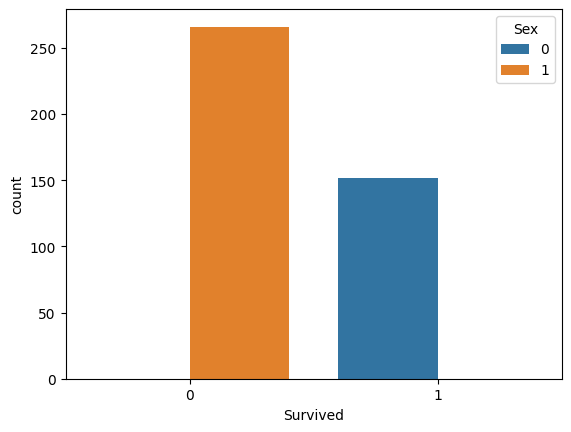

In [ ]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

#semua data laki-laki pada dataset pasti tidak selamat, sedangkan semua data perempuan selamat :)

<Axes: xlabel='Survived', ylabel='count'>

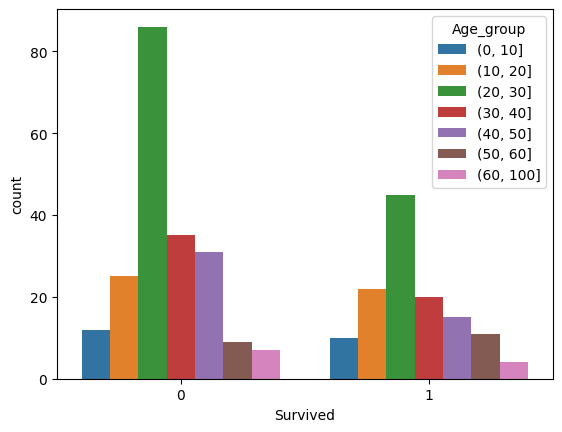

In [ ]:
sns.countplot(x = 'Survived', hue = 'Age_group', data = df)

#berdasarkan plot dibawah, didapat informasi bahwa range umur yang paling banyak tidak selamat adalah dari 20 - 30 tahun. Hal ini bisa disebabkan karena jumlah orang yang berumur 20 - 30 paling banyak diantara range umur lainnya.

In [ ]:
#mengecek missing valuee
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_group       86
Fare_group       3
dtype: int64

In [ ]:
#Missing value pada AgeGroup dan FareGroup bisa diignore karena nanti akan di drop ketika model training (hanya untuk visualisasi)

In [ ]:
#karna data cabin terlalu banyak yang hilang, maka kolom cabin akan dihilangkan
#karna data Sex memiliki korelasi 1, maka juga akan di drop untuk menghindari overfit pada model
df = df.drop('Sex', axis = 1)
df = df.drop('Cabin', axis = 1)

df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Fare_group
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,"(30.0, 40.0]","(0, 100]"
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,2,"(40.0, 50.0]","(0, 100]"
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,"(60.0, 100.0]","(0, 100]"
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,2,"(20.0, 30.0]","(0, 100]"
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,2,"(20.0, 30.0]","(0, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,2,NaN,"(0, 100]"
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,0,"(30.0, 40.0]","(100, 200]"
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,2,"(30.0, 40.0]","(0, 100]"
416,1308,0,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,2,NaN,"(0, 100]"


In [ ]:
#Semua data usia yang kosong diisi dengan rata-rata dari usia
#Kenapa data usia tidak di drop saja per barisnya? Hal ini dikarenakan dataset saya hanya memiliki 418 baris. Sehingga apabila di drop
mean = df['Age'].mean().round()
df['Age'] = df['Age'].fillna(mean)

df

#buang data NULL -> sisa 1 data fare
df = df.dropna()

df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Fare_group
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,"(30, 40]","(0, 100]"
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,2,"(40, 50]","(0, 100]"
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,"(60, 100]","(0, 100]"
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,2,"(20, 30]","(0, 100]"
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,2,"(20, 30]","(0, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",3.0,1,1,SOTON/O.Q. 3101315,13.7750,2,"(0, 10]","(0, 100]"
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37.0,1,0,19928,90.0000,1,"(30, 40]","(0, 100]"
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",28.0,0,0,347086,7.7750,2,"(20, 30]","(0, 100]"
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,0,"(30, 40]","(100, 200]"


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_group      0
Fare_group     0
dtype: int64

In [ ]:
#Data PassengerID, Nama, Serta NomorTiket juga akan didrop. Hal ini dikarenakan untuk mengklasifikasikan seseorang selamat atau tidak pada suatu kecelakaan, ID, nama, serta nomor tiket tidak akan memberikan informasi apapun.
to_be_dropped = ['PassengerId', 'Name', 'Ticket', 'Age_group', 'Fare_group']
df = df.drop(to_be_dropped, axis = 1)

df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,34.5,0,0,7.8292,1
1,1,3,47.0,1,0,7.0000,2
2,0,2,62.0,0,0,9.6875,1
3,0,3,27.0,0,0,8.6625,2
4,1,3,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
409,1,3,3.0,1,1,13.7750,2
411,1,1,37.0,1,0,90.0000,1
412,1,3,28.0,0,0,7.7750,2
414,1,1,39.0,0,0,108.9000,0


In [ ]:
#pemisahan kelas antara kelasTarget dan kelasPrediksi
x = df.drop('Survived', axis = 1)
y = df['Survived']

In [ ]:
x

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,2
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,2
4,3,22.0,1,1,12.2875,2
...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,2
411,1,37.0,1,0,90.0000,1
412,3,28.0,0,0,7.7750,2
414,1,39.0,0,0,108.9000,0


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 330, dtype: int64

In [ ]:
x = x.values
y = y.values

MODEL

In [ ]:
#Split data menjadi 80% Training 20% Testing
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [ ]:
#Gunakan model Logistic Regression sebagai model klasifikasi
model = LogisticRegression()

model.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
y_pred = model.predict(xTest)

EVALUATION

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

#menampilkan nilai presisi dari model
print(f'Accuracy Score = {accuracy_score(y_pred, yTest) * 100} %')

#model memiliki hasil akurasi yang tidak begitu baik (63%). Hal ini dapat dikarenakan kurangnya data yang memiliki korelasi tinggi dengan kolom 'survived'. Jika kolom age tidak di drop, maka akurasi dari model akan menjadi 100%

Accuracy Score = 63.63636363636363 %


In [ ]:
#Nilai recall, presisi, serta f1-score didapatkan dengan bantuan classification report
report = classification_report(y_pred, yTest)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        52
           1       0.27      0.43      0.33        14

    accuracy                           0.64        66
   macro avg       0.55      0.56      0.54        66
weighted avg       0.70      0.64      0.66        66

